In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#GridSearch = testa todas combinações possívei, porém, leva muito tempo
#Random Search = testa algumas combinaçôes com base na distribuição
#Bayesian Search = testa algumas combinações, mas usa modelo preditivo para ver quais hiperparâmetros afetam no resultado final

In [ ]:
#RandomSearchforHyper-ParameterOptimization

In [7]:
df = pd.read_pickle(r'C:\Users\usuario\Documents\12° SEMESTRE\TCC2\data\data_pre_processed.pkl')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,3,8.0,0,0,0


In [8]:
X = df.drop('HeartDisease', axis=1)
y = df[['HeartDisease']]

X_treino, X_teste, y_treino, y_test = train_test_split(X,y, random_state=42)

X_treino.shape, X_teste.shape, y_treino.shape, y_test.shape

((236415, 17), (78806, 17), (236415, 1), (78806, 1))

In [4]:
classificador_RF = RandomForestClassifier()
classificador_DT = DecisionTreeClassifier()
classificador_XGB = xgb.XGBClassifier()

In [ ]:
'''
max_depth: A profundidade máxima da árvore. Controla a complexidade do modelo e ajuda a evitar o sobreajuste.

min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno. Valores mais altos podem evitar o sobreajuste.

min_samples_leaf: O número mínimo de amostras necessárias em um nó folha. Similar ao min_samples_split, um valor mais alto pode evitar o sobreajuste.

max_features: O número máximo de recursos a serem considerados ao procurar a melhor divisão. Geralmente, usar todos os recursos é a melhor opção, mas pode ser útil experimentar diferentes valores.

criterion: A função para medir a qualidade de uma divisão. Geralmente, pode ser "gini" para o índice Gini ou "entropy" para o ganho de informação. Experimente ambos para ver qual funciona melhor para o seu conjunto de dados.

'''

In [16]:
def tunagem(modelo, tipo_modelo, metodologia, X, y):

    if metodologia=='Oversampling':
        bal = SMOTE(random_state=42)
        X_resemple, y_resemple =  bal.fit_resample(X, y)
    elif metodologia=='Undersampling':
        bal = RandomUnderSampler(random_state=42)
        X_resemple, y_resemple = bal.fit_resample(X, y)
    elif metodologia =='SMOTEENN':
        bal = SMOTEENN(random_state=42, sampling_strategy=0.5, n_jobs=-1)
        X_resemple, y_resemple = bal.fit_resample(X, y)
    else:
        X_resemple = X
        y_resemple = y

    if tipo_modelo == 'RF':
        param = {
            "n_estimators":[100, 200, 300],
            "max_depth": [10,20,30],
            "max_features": ['auto', 'sqrt', 'log2'],
            "criterion": ["gini", "entropy"]
                }
    elif tipo_modelo=='DT':
        param = {
            "max_depth": [10,20,30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features": [5, 10, 15],
            "criterion": ["gini", "entropy"]
               }

    elif tipo_modelo =='XGB':
        param ={
            'max_depth':[10,20, 30],
            'n_estimators':[100, 200, 300, 400],
            'eta':[0.3, 0.6, 0.9, None],
            'subsample': [0.5, 1, None],
            'colsample_bytree': [0.5, 1, None],
                }
    
    rand_search = RandomizedSearchCV(modelo, param, n_iter= 15, scoring='precision', verbose=True, cv=3, n_jobs=-1, random_state=42)
    rand_search.fit(X_resemple,y_resemple)
    print(rand_search.best_estimator_)



### Best Params with Decision Tree

In [22]:
tunagem(classificador_DT,'DT','Oversampling',X,y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features=10)


In [24]:
tunagem(classificador_DT,'DT','Undersampling',X,y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=5,
                       min_samples_leaf=2)


In [25]:
tunagem(classificador_DT,'DT','None',X,y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features=15)


In [26]:
tunagem(classificador_DT,'DT','SMOTEENN',X,y)

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Fitting 3 folds for each of 30 candidates, totalling 90 fits
DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features=15)


### Best Params with Random Forest

In [7]:
tunagem(classificador_RF,'RF','Oversampling',X,y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
24 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\base.py", line 637, in _val

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=300)


In [8]:
tunagem(classificador_RF,'RF','Undersampling',X,y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
24 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\base.py", line 637, in _vali

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300)


In [9]:
tunagem(classificador_RF,'RF','None',X,y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
24 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\base.py", line 637, in _val

RandomForestClassifier(max_depth=30, max_features='log2')


In [10]:
tunagem(classificador_RF,'RF','SMOTEENN',X,y)

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Fitting 3 folds for each of 30 candidates, totalling 90 fits


### Best Params with XGBOOSTING

In [11]:
tunagem(classificador_XGB,'XGB','Oversampling',X,y)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=None, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=30,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


In [17]:
tunagem(classificador_XGB,'XGB','Undersampling',X,y)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)


In [ ]:
tunagem(classificador_XGB,'XGB','None',X,y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.9, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


In [ ]:
tunagem(classificador_XGB,'XGB','SMOTEENN',X,y)

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Fitting 3 folds for each of 30 candidates, totalling 90 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.6, eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)


### Validação Cruzada 

In [13]:
def validacao_cruzada(modelo, X, y, balanceamento):
    kfold = KFold(n_splits=5)

    acuracias = []
    precisao = []
    f1=[]
    recall = []


    for idx, (idx_treino, idx_validacao) in enumerate(kfold.split(X)):
        X_split_treino = X.iloc[idx_treino,:]
        y_split_treino = y.iloc[idx_treino,:]

        if balanceamento=='Oversampling':
            bal = SMOTE(random_state=42)
            X_split_treino, y_split_treino =  bal.fit_resample(X_split_treino, y_split_treino)
        elif balanceamento=='Undersampling':
            bal = RandomUnderSampler(random_state=42)
            X_split_treino, y_split_treino = bal.fit_resample(X_split_treino, y_split_treino)
        elif balanceamento =='SMOTEENN':
            bal = SMOTEENN(random_state=42, sampling_strategy=0.5, n_jobs=-1)
            X_split_treino, y_split_treino = bal.fit_resample(X_split_treino, y_split_treino)
        
        modelo.fit(X_split_treino, y_split_treino.values.flatten())

        X_split_validacao = X.iloc[idx_validacao,:]
        y_split_validacao = y.iloc[idx_validacao,:]

        predicao_validacao = modelo.predict(X_split_validacao)
        
        acuracia_split = accuracy_score(y_split_validacao,predicao_validacao)
        precision_split = precision_score(y_split_validacao,predicao_validacao)
        f1_split = f1_score(y_split_validacao,predicao_validacao)
        recall_split = recall_score(y_split_validacao,predicao_validacao)


        acuracias.append(acuracia_split)
        precisao.append(precision_split)
        f1.append(f1_split)
        recall.append(recall_split)


        print(f'Acurácia do split {idx}: {acuracia_split}')
        print(f'Precisão do split {idx}: {precision_split}')
        print(f'F1 do split {idx}: {f1_split}')
        print(f'Recall do split {idx}: {recall_split}')
        print('')
        

    print(f'Média acurácia: {sum(acuracias)/len(acuracias)}')
    print(f'Média precisão: {sum(precisao)/len(precisao)}')
    print(f'Média F1: {sum(f1)/len(f1)}')
    print(f'Média Recall: {sum(recall)/len(recall)}')
    return modelo

## Avaliação Decision Tree

In [9]:
classificador_DT_Oversampling = DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features=10)
classificador_DT_Undersampling = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=5, min_samples_leaf=2)
classificador_DT_SemBal = DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features=15)
classificador_DT_SMOTEENN = DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features=15)

### OVERSAMPLING

In [10]:
modelo = validacao_cruzada(classificador_DT_Oversampling, X_treino, y_treino, 'Oversampling')

Acurácia do split 0: 0.8179261045195948
Precisão do split 0: 0.19854847071021253
F1 do split 0: 0.2624860789856935
Recall do split 0: 0.387161991407632

Acurácia do split 1: 0.817185880760527
Precisão do split 1: 0.1957886476589066
F1 do split 1: 0.2572606977143839
Recall do split 1: 0.375

Acurácia do split 2: 0.8158534779942052
Precisão do split 2: 0.19611125418490857
F1 do split 2: 0.2591678720326725
Recall do split 2: 0.381991472284926

Acurácia do split 3: 0.8136116574667428
Precisão do split 3: 0.19241192411924118
F1 do split 3: 0.25281899109792283
Recall do split 3: 0.3685121107266436

Acurácia do split 4: 0.8156842839921324
Precisão do split 4: 0.19550706033376122
F1 do split 4: 0.2589915823484398
Recall do split 4: 0.3835305968269957

Média acurácia: 0.8160522809466404
Média precisão: 0.19567347140140604
Média F1: 0.25814504443582253
Média Recall: 0.3792392342492395


In [11]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_treino, y_treino)

classificador_DT_Oversampling.fit(X_smote,y_smote)

pred = classificador_DT_Oversampling.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_DT_Oversampling = []
list_results_DT_Oversampling.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

Acurácia de dados de teste: 0.8203309392685836
Precisão de dados de teste: 0.20653202903124013
F1-score de dados de teste: 0.2699664862077855
Recall de dados de teste: 0.389641315671975


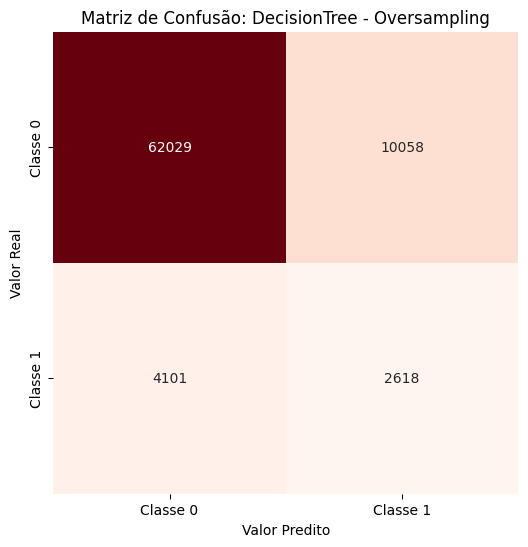

In [12]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: DecisionTree - Oversampling')
plt.show()

In [13]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.389641315671975
Especificidade: 0.860474149291828
Erro Tipo 1: 0.13952585070817208
Erro Tipo 2: 0.610358684328025


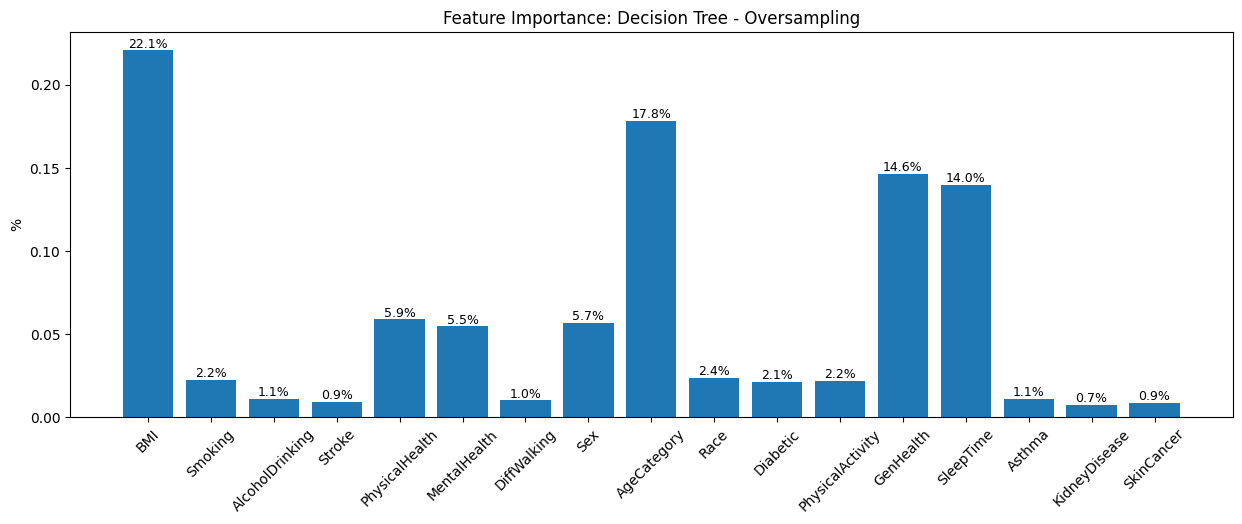

In [14]:
feature_importances = classificador_DT_Oversampling.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Decision Tree - Oversampling')
plt.ylabel('%')
plt.show()

### UNDERSAMPLING

In [15]:
validacao_cruzada(classificador_DT_Undersampling, X_treino, y_treino, 'Undersampling')

Acurácia do split 0: 0.7186726730537403
Precisão do split 0: 0.19767065674538983
F1 do split 0: 0.31475376056047805
Recall do split 0: 0.7720495324740966

Acurácia do split 1: 0.7176363597910455
Precisão do split 1: 0.19982038616973508
F1 do split 1: 0.3181655686635003
Recall do split 1: 0.780310621242485

Acurácia do split 2: 0.7276399551635895
Precisão do split 2: 0.20448048926410956
F1 do split 2: 0.3232790331056227
Recall do split 2: 0.7715073990469025

Acurácia do split 3: 0.7424232810946851
Precisão do split 3: 0.21336434764220766
F1 do split 3: 0.33203532057258817
Recall do split 3: 0.7481463173504695

Acurácia do split 4: 0.7163885540257597
Precisão do split 4: 0.20127856193429963
F1 do split 4: 0.32169954476479506
Recall do split 4: 0.8008058423570888

Média acurácia: 0.724552164625764
Média precisão: 0.20332288835114837
Média F1: 0.32198664553339684
Média Recall: 0.7745639424942085


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=5,
                       min_samples_leaf=2)

In [16]:
under = RandomUnderSampler(random_state=42)
X_under, y_under = under.fit_resample(X_treino, y_treino)

classificador_DT_Undersampling.fit(X_under,y_under)

pred = classificador_DT_Undersampling.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_DT_Undersampling = []
list_results_DT_Undersampling.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

Acurácia de dados de teste: 0.7146283277923001
Precisão de dados de teste: 0.19939001143728555
F1-score de dados de teste: 0.3174603174603175
Recall de dados de teste: 0.778389641315672


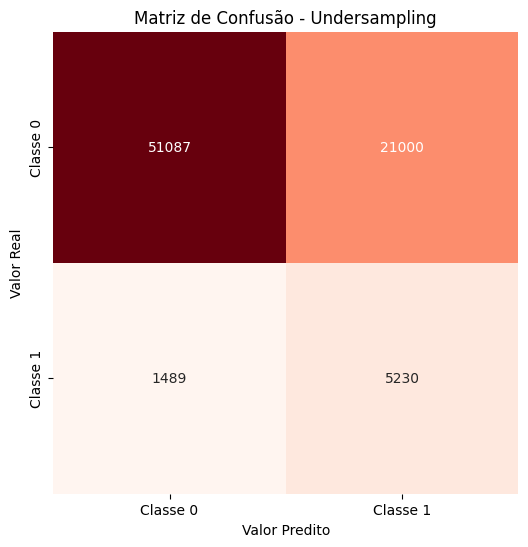

In [17]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Undersampling')
plt.show()

In [18]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.778389641315672
Especificidade: 0.708685338549253
Erro Tipo 1: 0.291314661450747
Erro Tipo 2: 0.22161035868432802


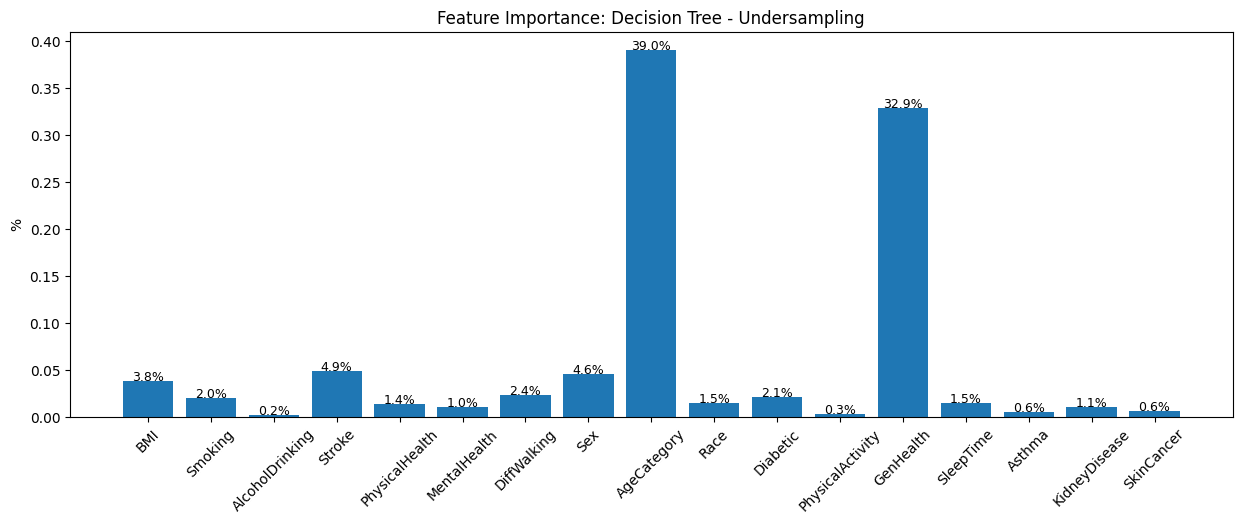

In [19]:
feature_importances = classificador_DT_Undersampling.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Decision Tree - Undersampling')
plt.ylabel('%')
plt.show()

### SEM BALANCEAMENTO

In [20]:
validacao_cruzada(classificador_DT_SemBal, X_treino, y_treino, 'None')

Acurácia do split 0: 0.8731890954465664
Precisão do split 0: 0.2289284764690242
F1 do split 0: 0.22311479657942473
Recall do split 0: 0.2175890826383624

Acurácia do split 1: 0.8742042594590022
Precisão do split 1: 0.24017003188097769
F1 do split 1: 0.2331098504383703
Recall do split 1: 0.22645290581162325

Acurácia do split 2: 0.8733371401983799
Precisão do split 2: 0.241343669250646
F1 do split 2: 0.2377497772686776
Recall do split 2: 0.2342613493855029

Acurácia do split 3: 0.8710318719201404
Precisão do split 3: 0.22943037974683544
F1 do split 3: 0.2219954069915795
Recall do split 3: 0.21502718734552645

Acurácia do split 4: 0.874140811708225
Precisão do split 4: 0.24563206577595068
F1 do split 4: 0.2431641866971894
Recall do split 4: 0.24074540418030724

Média acurácia: 0.8731806357464628
Média precisão: 0.23710092462468682
Média F1: 0.2318268035950483
Média Recall: 0.22681518587226446


DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features=15)

In [21]:
classificador_DT_SemBal.fit(X_treino,y_treino)

pred = classificador_DT_SemBal.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_DT_SemBal = []
list_results_DT_SemBal.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

Acurácia de dados de teste: 0.8726746694414131
Precisão de dados de teste: 0.23543495610534718
F1-score de dados de teste: 0.22720271102895875
Recall de dados de teste: 0.21952671528501266


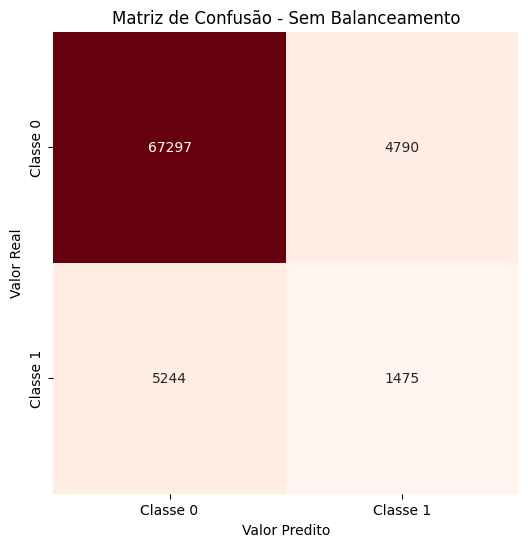

In [22]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Sem Balanceamento')
plt.show()

In [23]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.21952671528501266
Especificidade: 0.9335525129357581
Erro Tipo 1: 0.06644748706424182
Erro Tipo 2: 0.7804732847149873


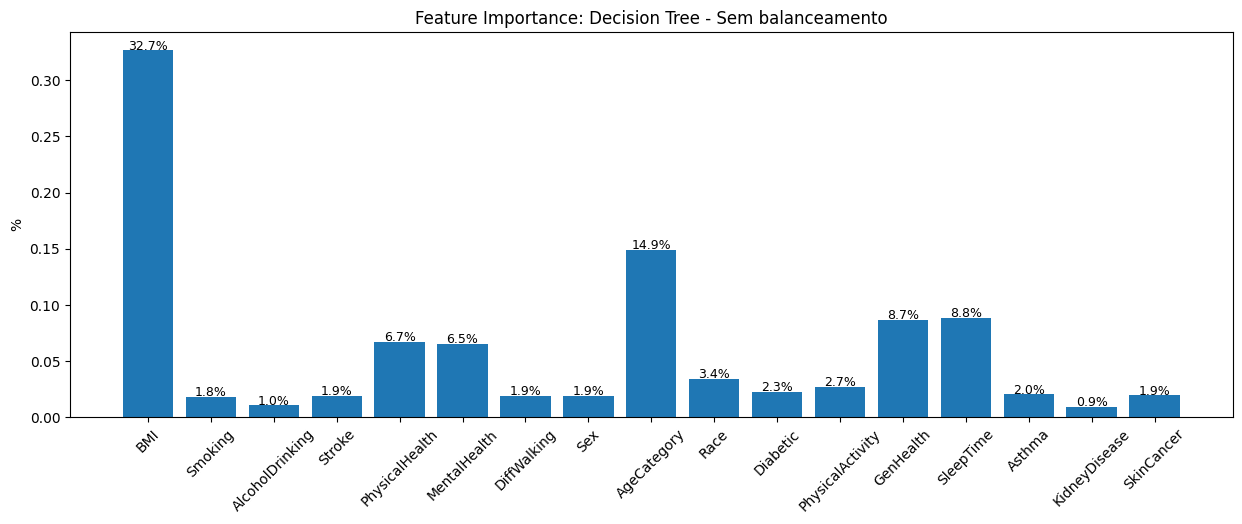

In [24]:
feature_importances = classificador_DT_SemBal.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Decision Tree - Sem balanceamento')
plt.ylabel('%')
plt.show()

### SMOTEENN

In [25]:
validacao_cruzada(classificador_DT_SMOTEENN, X_treino, y_treino, 'SMOTEENN')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 0: 0.8062940168771017
Precisão do split 0: 0.2143641555018669
F1 do split 0: 0.29885937380387356
Recall do split 0: 0.49330300732878446



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 1: 0.805025061861557
Precisão do split 1: 0.21490127631722483
F1 do split 1: 0.2994148491526712
Recall do split 1: 0.4934869739478958



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 2: 0.8030370323372037
Precisão do split 2: 0.21377901977644023
F1 do split 2: 0.2993002783838688
Recall do split 2: 0.49887133182844245



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 3: 0.806378613878138
Precisão do split 3: 0.22036124794745485
F1 do split 3: 0.3054396479781503
Recall do split 3: 0.49752842313395945



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 4: 0.8037138083454941
Precisão do split 4: 0.21598202824133506
F1 do split 4: 0.30317591410766576
Recall do split 4: 0.5084361621757744

Média acurácia: 0.804889706659899
Média precisão: 0.21587754555686436
Média F1: 0.3012380126852459
Média Recall: 0.49832517968297124


DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features=15)

In [26]:
smoteenn = SMOTEENN(random_state=42, sampling_strategy=0.5, n_jobs=-1)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_treino, y_treino)

classificador_DT_SMOTEENN.fit(X_smoteenn,y_smoteenn)

pred = classificador_DT_SMOTEENN.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_DT_SMOTEENN = []
list_results_DT_SMOTEENN.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia de dados de teste: 0.8071085957921985
Precisão de dados de teste: 0.22230225248821373
F1-score de dados de teste: 0.3087626756400345
Recall de dados de teste: 0.5052835243339783


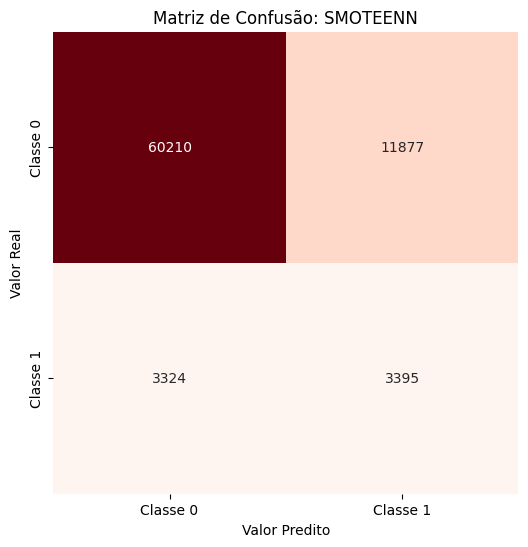

In [27]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: SMOTEENN')
plt.show()

In [28]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.5052835243339783
Especificidade: 0.8352407507594989
Erro Tipo 1: 0.16475924924050106
Erro Tipo 2: 0.4947164756660217


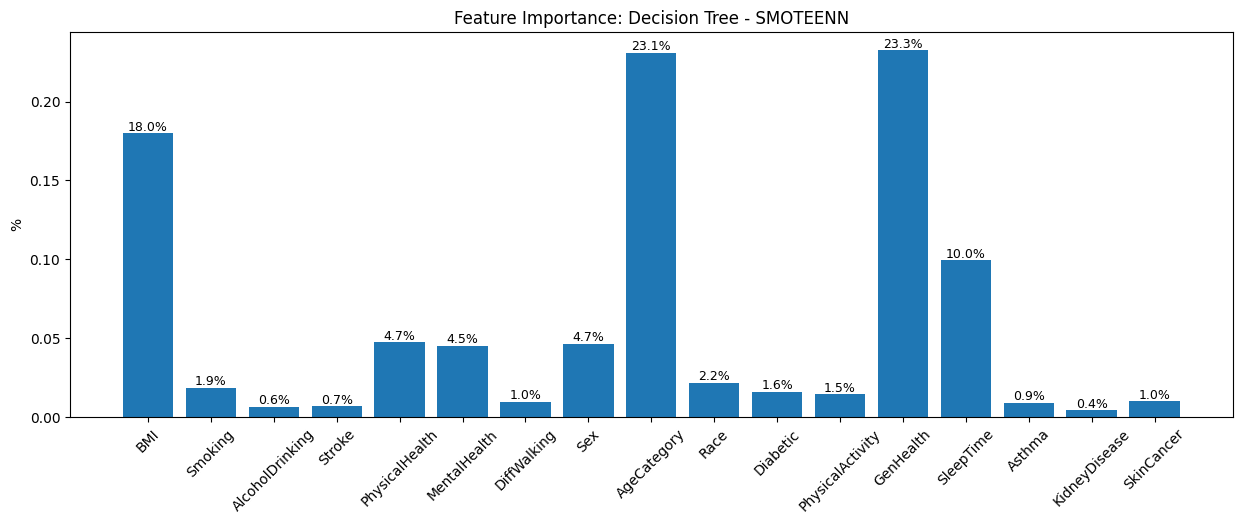

In [31]:
feature_importances = classificador_DT_SMOTEENN.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Decision Tree - SMOTEENN')
plt.ylabel('%')
plt.show()

### Avaliação Final Decisiom Tree

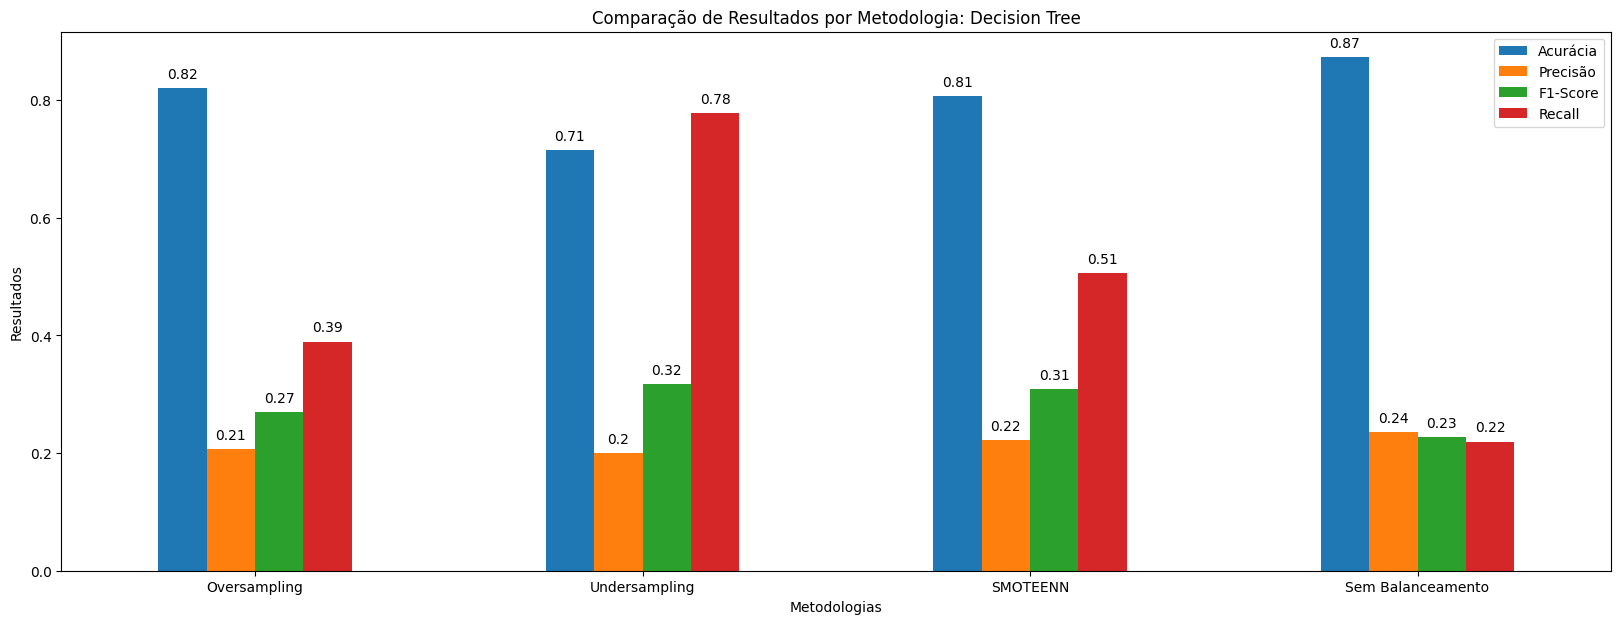

In [32]:
df_avaliacao_DT = pd.DataFrame()
df_avaliacao_DT['id'] = ['Acurácia', 'Precisão', 'F1-Score', 'Recall']
df_avaliacao_DT['Oversampling'] = list_results_DT_Oversampling
df_avaliacao_DT['Undersampling'] = list_results_DT_Undersampling
df_avaliacao_DT['SMOTEENN'] = list_results_DT_SMOTEENN
df_avaliacao_DT['Sem Balanceamento'] = list_results_DT_SemBal

df_avaliacao_DT.set_index('id',inplace=True)

df_transpose = df_avaliacao_DT.transpose()

ax = df_transpose.plot(kind='bar', figsize=(20, 7))
ax.legend(title='')
plt.title('Comparação de Resultados por Metodologia: Decision Tree')
plt.xlabel('Metodologias')
plt.ylabel('Resultados')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

## Avaliação Random Forest

In [41]:
classificador_RF_Oversampling = RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=300)
classificador_RF_Undersampling = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300)
classificador_RF_SemBal = RandomForestClassifier(max_depth=30, max_features='log2')
classificador_RF_SMOTEENN = RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=300)

### OVERSAMPLING

In [42]:
validacao_cruzada(classificador_RF_Oversampling, X_treino, y_treino, 'Oversampling')

Acurácia do split 0: 0.8520821436880063
Precisão do split 0: 0.24585774058577406
F1 do split 0: 0.29581151832460734
Recall do split 0: 0.3712408390194592

Acurácia do split 1: 0.8509189349237569
Precisão do split 1: 0.2413267896429176
F1 do split 1: 0.28805171194828805
Recall do split 1: 0.3572144288577154

Acurácia do split 2: 0.8497345769092486
Precisão do split 2: 0.24016666666666667
F1 do split 2: 0.2885751476919996
Recall do split 2: 0.3614246300476549

Acurácia do split 3: 0.8507920394222025
Precisão do split 3: 0.2417167381974249
F1 do split 3: 0.2852801134636815
Recall do split 3: 0.34799802273850716

Acurácia do split 4: 0.8483598756424084
Precisão do split 4: 0.2359253755984811
F1 do split 4: 0.28500199441563623
Recall do split 4: 0.35985897758750945

Média acurácia: 0.8503775141171246
Média precisão: 0.24099866213825286
Média F1: 0.28854409716884255
Média Recall: 0.3595473796501692


RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=300)

In [43]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_treino, y_treino)

classificador_RF_Oversampling.fit(X_smote,y_smote)

pred = classificador_RF_Oversampling.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_RF_Oversampling = []
list_results_RF_Oversampling.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia de dados de teste: 0.849326193437048
Precisão de dados de teste: 0.24538180381309888
F1-score de dados de teste: 0.29497684360527254
Recall de dados de teste: 0.3696978717070993


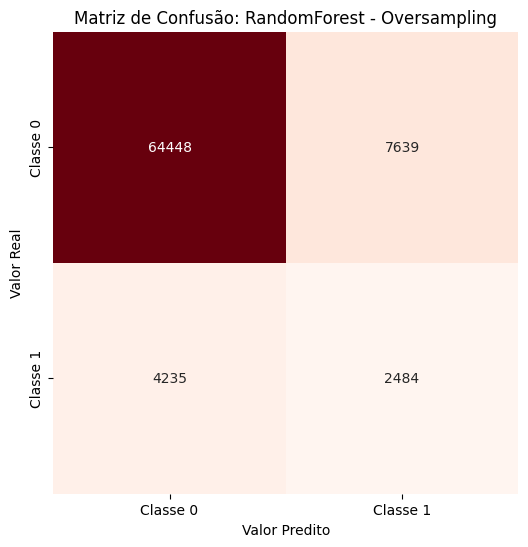

In [44]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: RandomForest - Oversampling')
plt.show()

In [45]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.3696978717070993
Especificidade: 0.8940308238656068
Erro Tipo 1: 0.10596917613439316
Erro Tipo 2: 0.6303021282929008


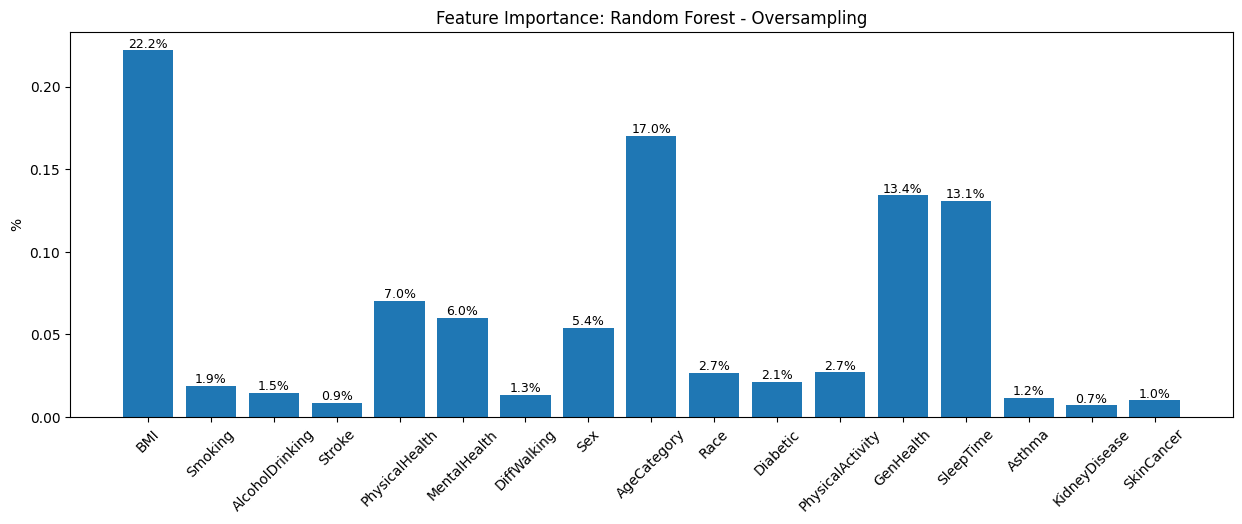

In [46]:
feature_importances = classificador_RF_Oversampling.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Random Forest - Oversampling')
plt.ylabel('%')
plt.show()

### Undersampling

In [47]:
validacao_cruzada(classificador_RF_Undersampling, X_treino, y_treino, 'Undersampling')

Acurácia do split 0: 0.7206607025780936
Precisão do split 0: 0.2053633989426078
F1 do split 0: 0.32804232804232797
Recall do split 0: 0.8147586555471317

Acurácia do split 1: 0.7234947021128101
Precisão do split 1: 0.20831192189105857
F1 do split 1: 0.33159509202453985
Recall do split 1: 0.812374749498998

Acurácia do split 2: 0.7189899118076264
Precisão do split 2: 0.20595674718603768
F1 do split 2: 0.32897328417756677
Recall do split 2: 0.8169049410584399

Acurácia do split 3: 0.7205338070765391
Precisão do split 3: 0.20961611554541998
F1 do split 3: 0.33370310609116577
Recall do split 3: 0.8178447849728127

Acurácia do split 4: 0.7203646130744665
Precisão do split 4: 0.2081887578070784
F1 do split 4: 0.33296337402885684
Recall do split 4: 0.8310249307479224

Média acurácia: 0.7208087473299072
Média precisão: 0.2074873882744405
Média F1: 0.3310554368728914
Média Recall: 0.8185816123650609


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300)

In [48]:
under = RandomUnderSampler(random_state=42)
X_under, y_under = under.fit_resample(X_treino, y_treino)

classificador_RF_Undersampling.fit(X_under,y_under)

pred = classificador_RF_Undersampling.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_RF_Undersampling = []
list_results_RF_Undersampling.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia de dados de teste: 0.7234601426287338
Precisão de dados de teste: 0.2112924231977323
F1-score de dados de teste: 0.3360853008377761
Recall de dados de teste: 0.8209554993302575


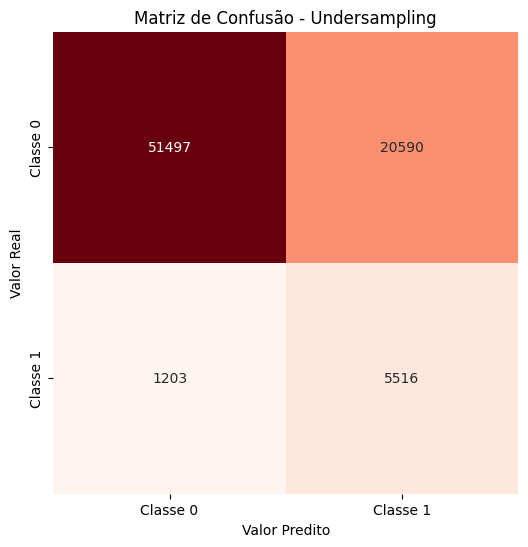

In [49]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Undersampling')
plt.show()

In [50]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.8209554993302575
Especificidade: 0.7143729105109105
Erro Tipo 1: 0.28562708948908955
Erro Tipo 2: 0.17904450066974253


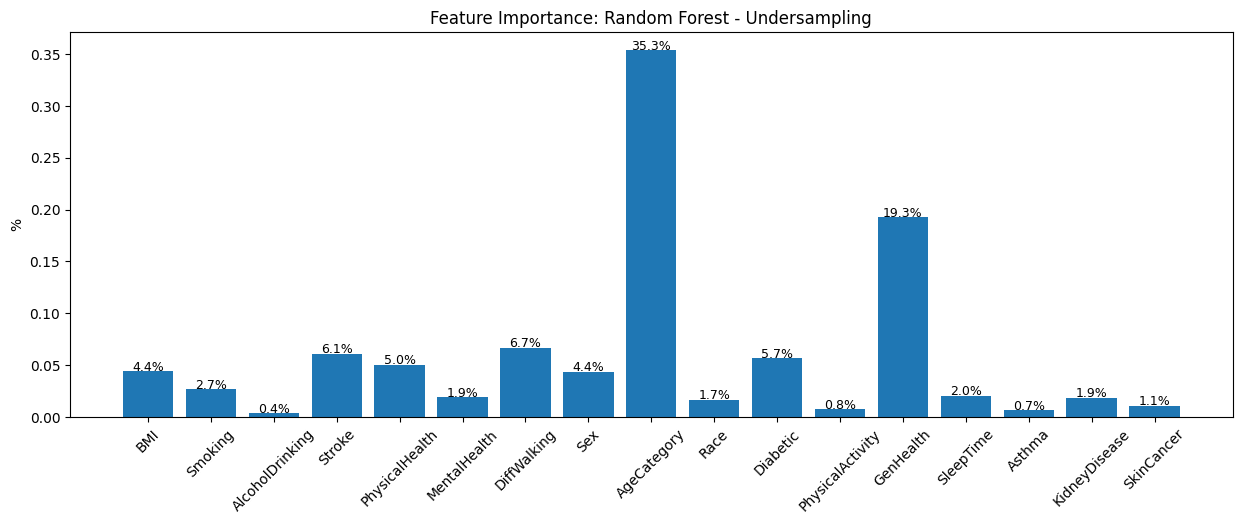

In [51]:
feature_importances = classificador_RF_Undersampling.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Random Forest - Undersampling')
plt.ylabel('%')
plt.show()

### SEM BALANCEAMENTO

In [52]:
validacao_cruzada(classificador_RF_SemBal, X_treino, y_treino, 'None')

Acurácia do split 0: 0.9117230294186071
Precisão do split 0: 0.3928923988153998
F1 do split 0: 0.16016096579476863
Recall do split 0: 0.1005812484205206

Acurácia do split 1: 0.9108347609077259
Precisão do split 1: 0.3961038961038961
F1 do split 1: 0.16844181459566074
Recall do split 1: 0.10696392785571142

Acurácia do split 2: 0.9102637311507307
Precisão do split 2: 0.3859180035650624
F1 do split 2: 0.16950479545899394
Recall do split 2: 0.10860295961876097

Acurácia do split 3: 0.9095658058921812
Precisão do split 3: 0.39312267657992567
F1 do split 3: 0.16516985552518548
Recall do split 3: 0.10454770143351458

Acurácia do split 4: 0.9119133726709389
Precisão do split 4: 0.40618955512572535
F1 do split 4: 0.1678321678321678
Recall do split 4: 0.1057668093679174

Média acurácia: 0.9108601400080367
Média precisão: 0.39484530603800183
Média F1: 0.16622191984135531
Média Recall: 0.10529252933928498


RandomForestClassifier(max_depth=30, max_features='log2')

In [53]:
classificador_RF_SemBal.fit(X_treino,y_treino)

pred = classificador_RF_SemBal.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_RF_SemBal = []
list_results_RF_SemBal.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia de dados de teste: 0.9100195416592646
Precisão de dados de teste: 0.40106382978723404
F1-score de dados de teste: 0.17536922898011395
Recall de dados de teste: 0.11221908022027087


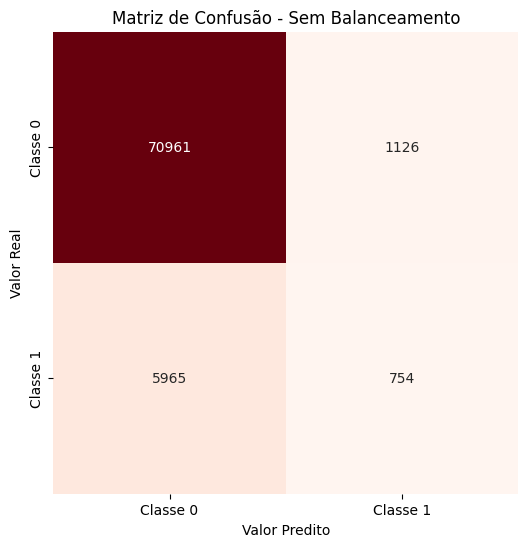

In [54]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Sem Balanceamento')
plt.show()

In [55]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.11221908022027087
Especificidade: 0.9843799852955457
Erro Tipo 1: 0.01562001470445434
Erro Tipo 2: 0.8877809197797292


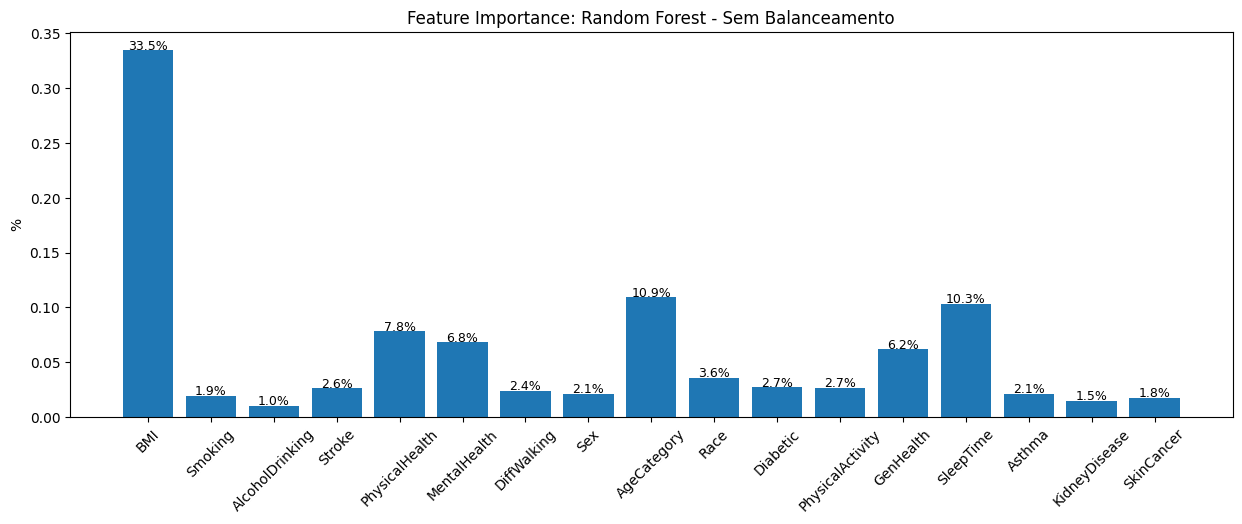

In [56]:
feature_importances = classificador_RF_SemBal.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Random Forest - Sem Balanceamento')
plt.ylabel('%')
plt.show()

### SMOTEENN

In [57]:
validacao_cruzada(classificador_RF_SMOTEENN, X_treino, y_treino, 'SMOTEENN')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 0: 0.8263858046232261
Precisão do split 0: 0.2543900184842883
F1 do split 0: 0.3491635614048997
Recall do split 0: 0.5564821834723275



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 1: 0.8256244316138993
Precisão do split 1: 0.25379182586546256
F1 do split 1: 0.347137540581202
Recall do split 1: 0.5490981963927856



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 2: 0.8235306558382506
Precisão do split 2: 0.25258375922771154
F1 do split 2: 0.34771732332707944
Recall do split 2: 0.5578128918986707



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 3: 0.8251379988579405
Precisão do split 3: 0.2549338286510332
F1 do split 3: 0.3469194312796208
Recall do split 3: 0.5427582797825012



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 4: 0.8240805363449866
Precisão do split 4: 0.25365521931315876
F1 do split 4: 0.3498514928872909
Recall do split 4: 0.5635859984890456

Média acurácia: 0.8249518854556606
Média precisão: 0.25387093030833086
Média F1: 0.34815786989601855
Média Recall: 0.5539475100070661


RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=300)

In [58]:
smoteenn = SMOTEENN(random_state=42, sampling_strategy=0.5, n_jobs=-1)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_treino, y_treino)

classificador_RF_SMOTEENN.fit(X_smoteenn,y_smoteenn)

pred = classificador_RF_SMOTEENN.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_RF_SMOTEENN = []
list_results_RF_SMOTEENN.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia de dados de teste: 0.8273862396264244
Precisão de dados de teste: 0.26030640668523675
F1-score de dados de teste: 0.35466578110916075
Recall de dados de teste: 0.556332787617205


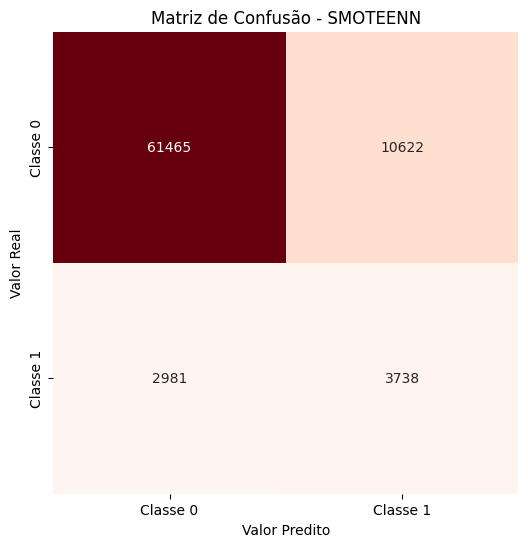

In [59]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - SMOTEENN')
plt.show()

In [60]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.556332787617205
Especificidade: 0.852650269812865
Erro Tipo 1: 0.147349730187135
Erro Tipo 2: 0.44366721238279505


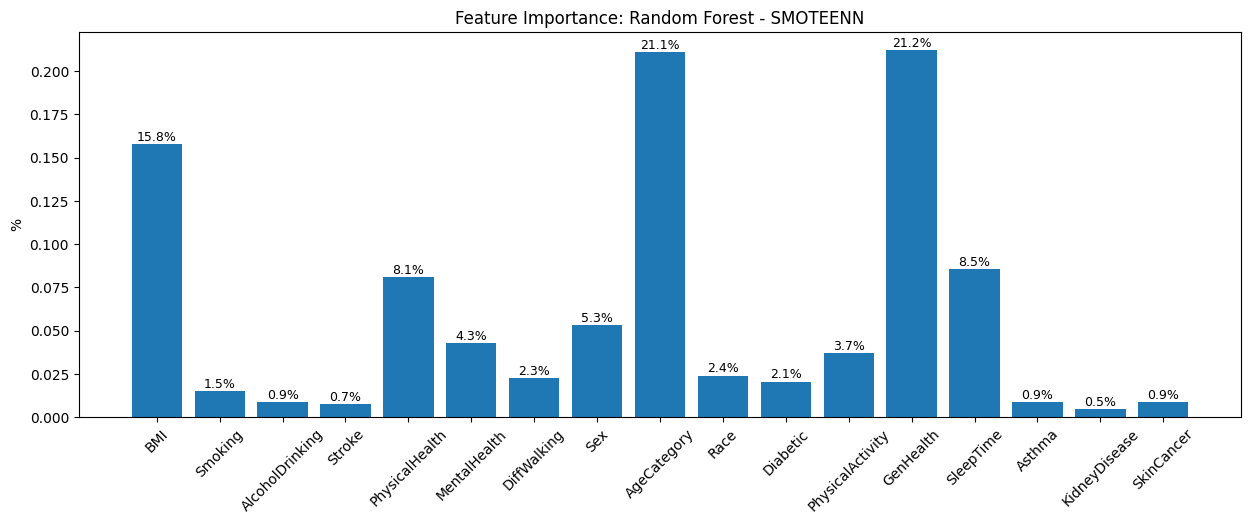

In [61]:
feature_importances = classificador_RF_SMOTEENN.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Random Forest - SMOTEENN')
plt.ylabel('%')
plt.show()

### Avaliação do modelo Random Forest

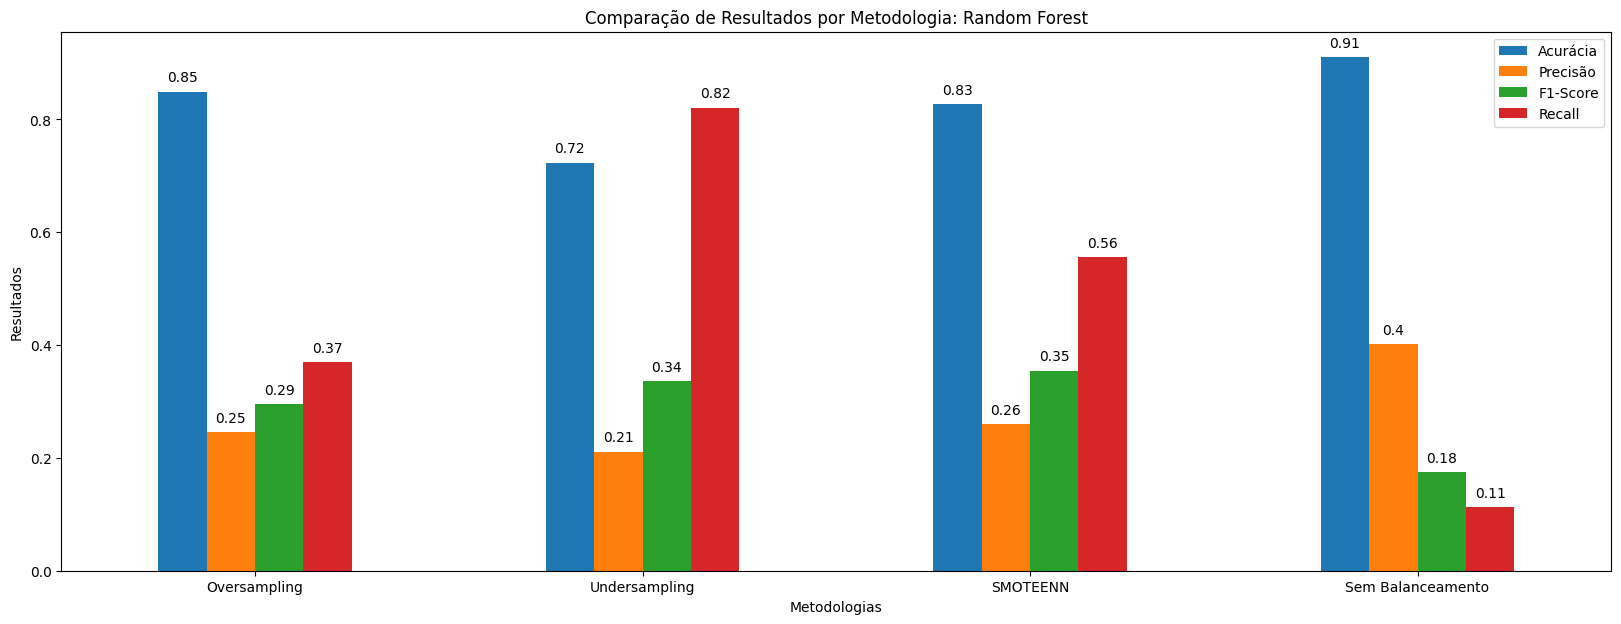

In [62]:
df_avaliacao_RF = pd.DataFrame()
df_avaliacao_RF['id'] = ['Acurácia', 'Precisão', 'F1-Score', 'Recall']
df_avaliacao_RF['Oversampling'] = list_results_RF_Oversampling
df_avaliacao_RF['Undersampling'] = list_results_RF_Undersampling
df_avaliacao_RF['SMOTEENN'] = list_results_RF_SMOTEENN
df_avaliacao_RF['Sem Balanceamento'] = list_results_RF_SemBal

df_avaliacao_RF.set_index('id',inplace=True)

df_transpose = df_avaliacao_RF.transpose()

ax = df_transpose.plot(kind='bar', figsize=(20, 7))
ax.legend(title='')
plt.title('Comparação de Resultados por Metodologia: Random Forest')
plt.xlabel('Metodologias')
plt.ylabel('Resultados')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

## Avaliação Modelo XGBOOST

In [22]:
#classificador_XGB_Oversampling = xgb.XGBClassifier(max_depth=15, eta=0.01, min_child_weight= 2, olsample_bytree=0.9)
classificador_XGB_Oversampling = xgb.XGBClassifier(max_depth=6, eta=0.05, colsample_bytree=1, n_estimators=300)
classificador_XGB_Undersampling = xgb.XGBClassifier( max_depth=6, eta=0.05)
classificador_XGB_SemBal = xgb.XGBClassifier(colsample_bytree=1, eta=0.1, max_depth=10,n_estimators=200)
classificador_XGB_SMOTEENN = xgb.XGBClassifier(eta=0.1, max_depth=6, n_estimators=300)

### OVERSAMPLING

In [86]:
validacao_cruzada(classificador_XGB_Oversampling, X_treino, y_treino, 'Oversampling')

Acurácia do split 0: 0.8224308948247785
Precisão do split 0: 0.23811209439528025
F1 do split 0: 0.32464607464607464
Recall do split 0: 0.5099823098306798

Acurácia do split 1: 0.8231499693335871
Precisão do split 1: 0.2437250762373915
F1 do split 1: 0.3320019172391756
Recall do split 1: 0.5205410821643287

Acurácia do split 2: 0.8211830890594929
Precisão do split 2: 0.23699081704732752
F1 do split 2: 0.322570306866437
Recall do split 2: 0.5048908954100828

Acurácia do split 3: 0.8216695218154516
Precisão do split 3: 0.2388663967611336
F1 do split 3: 0.3224043715846994
Recall do split 3: 0.4957983193277311

Acurácia do split 4: 0.8204640145506842
Precisão do split 4: 0.23926592797783933
F1 do split 4: 0.3281361297981797
Recall do split 4: 0.5220347519516495

Média acurácia: 0.8217794979167989
Média precisão: 0.23939206248379447
Média F1: 0.3259517600269133
Média Recall: 0.5106494717368943


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.05, eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [29]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_treino, y_treino)

classificador_XGB_Oversampling.fit(X_smote,y_smote)

pred = classificador_XGB_Oversampling.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_XGB_Oversampling = []
list_results_XGB_Oversampling.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

Acurácia de dados de teste: 0.8215618100144659
Precisão de dados de teste: 0.24273001191226964
F1-score de dados de teste: 0.3300619342544069
Recall de dados de teste: 0.5155529096591754


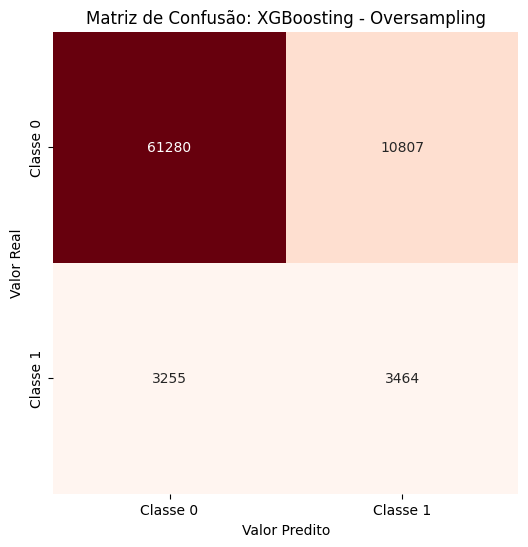

In [30]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: XGBoosting - Oversampling')
plt.show()

In [31]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.5155529096591754
Especificidade: 0.8500839263667513
Erro Tipo 1: 0.14991607363324871
Erro Tipo 2: 0.4844470903408245


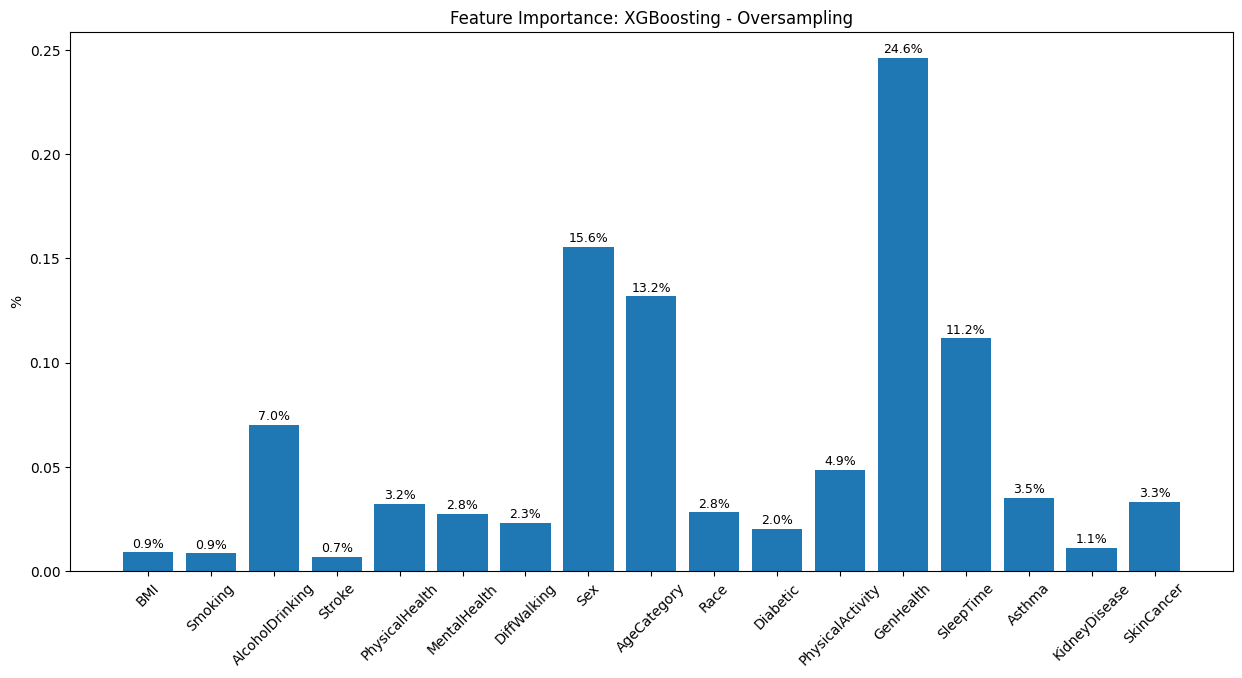

In [32]:
feature_importances = classificador_XGB_Oversampling.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,7))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: XGBoosting - Oversampling')
plt.ylabel('%')
plt.show()

### UNDERSAMPLING

In [32]:
validacao_cruzada(classificador_XGB_Undersampling, X_treino, y_treino, 'Undersampling')

Acurácia do split 0: 0.7287397161770616
Precisão do split 0: 0.20831414852331775
F1 do split 0: 0.33058455114822544
Recall do split 0: 0.8003538033864038

Acurácia do split 1: 0.7361842522682571
Precisão do split 1: 0.21624514920380034
F1 do split 1: 0.3413243214700602
Recall do split 1: 0.8096192384769539

Acurácia do split 2: 0.7278091491656621
Precisão do split 2: 0.21097156243899265
F1 do split 2: 0.3350211842513175
Recall do split 2: 0.8131427138199148

Acurácia do split 3: 0.7288454624283569
Precisão do split 3: 0.2139271043880811
F1 do split 3: 0.33854408502295824
Recall do split 3: 0.8109243697478992

Acurácia do split 4: 0.728337880422139
Precisão do split 4: 0.2122568093385214
F1 do split 4: 0.3375792893610438
Recall do split 4: 0.8242256358599849

Média acurácia: 0.7299832920922953
Média precisão: 0.21234295477854262
Média F1: 0.33661068625072105
Média Recall: 0.8116531522582313


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [34]:
under = RandomUnderSampler(random_state=42)
X_under, y_under = under.fit_resample(X_treino, y_treino)

classificador_XGB_Undersampling.fit(X_under,y_under)

pred = classificador_XGB_Undersampling.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_XGB_Undersampling = []
list_results_XGB_Undersampling.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

Acurácia de dados de teste: 0.7295510494124813
Precisão de dados de teste: 0.21375333437941316
F1-score de dados de teste: 0.33833162584210363
Recall de dados de teste: 0.8109837773478196


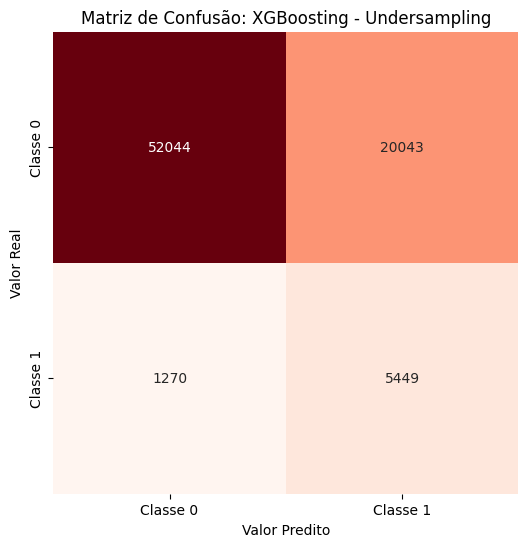

In [35]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: XGBoosting - Undersampling')
plt.show()

In [36]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.8109837773478196
Especificidade: 0.7219609638353656
Erro Tipo 1: 0.2780390361646344
Erro Tipo 2: 0.18901622265218038


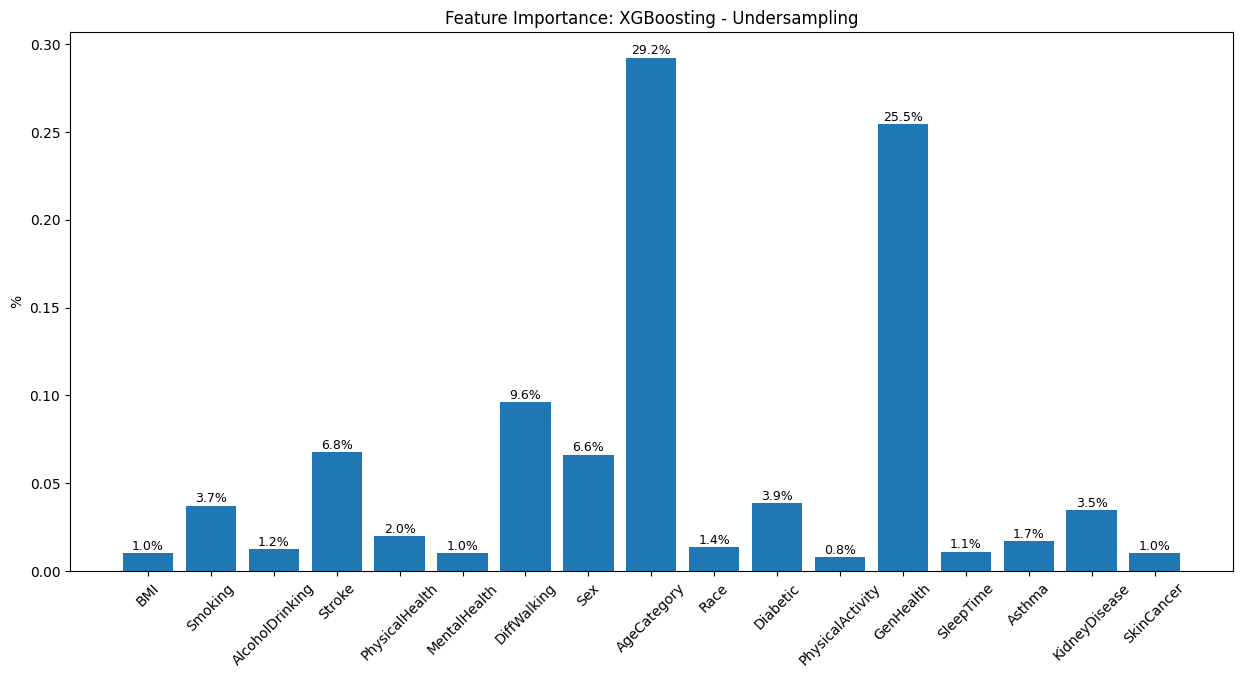

In [36]:
feature_importances = classificador_XGB_Undersampling.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,7))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: XGBoosting - Undersampling')
plt.ylabel('%')
plt.show()

### SEM BALANCEAMENTO

In [23]:
validacao_cruzada(classificador_XGB_SemBal, X_treino, y_treino, 'None')

Acurácia do split 0: 0.9155510437155003
Precisão do split 0: 0.4774436090225564
F1 do split 0: 0.16025236593059936
Recall do split 0: 0.09628506444275967

Acurácia do split 1: 0.9147685214559144
Precisão do split 1: 0.47665847665847666
F1 do split 1: 0.16146483562213898
Recall do split 1: 0.09719438877755511

Acurácia do split 2: 0.9156144914662775
Precisão do split 2: 0.4981949458483754
F1 do split 2: 0.1718555417185554
Recall do split 2: 0.1038374717832957

Acurácia do split 3: 0.9140494469471058
Precisão do split 3: 0.48981900452488686
F1 do split 3: 0.17565922920892496
Recall do split 3: 0.10701927829955511

Acurácia do split 4: 0.9151492079605777
Precisão do split 4: 0.4769403824521935
F1 do split 4: 0.1744855967078189
Recall do split 4: 0.10677411231427852

Média acurácia: 0.9150265423090753
Média precisão: 0.4838112837012978
Média F1: 0.16874351383760752
Média Recall: 0.10222206312348883


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.1, eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [24]:
classificador_XGB_SemBal.fit(X_treino,y_treino)

pred = classificador_XGB_SemBal.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_XGB_SemBal = []
list_results_XGB_SemBal.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

Acurácia de dados de teste: 0.914727305027536
Precisão de dados de teste: 0.4996426018584703
F1-score de dados de teste: 0.172209903917221
Recall de dados de teste: 0.10403333829438904


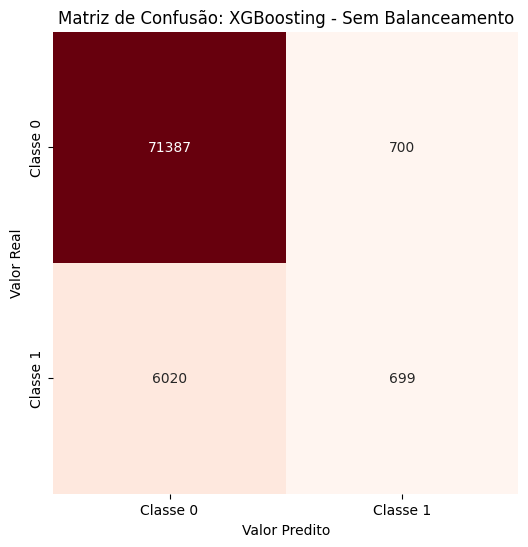

In [25]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: XGBoosting - Sem Balanceamento')
plt.show()

In [26]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.10403333829438904
Especificidade: 0.9902895112849751
Erro Tipo 1: 0.0097104887150249
Erro Tipo 2: 0.8959666617056109


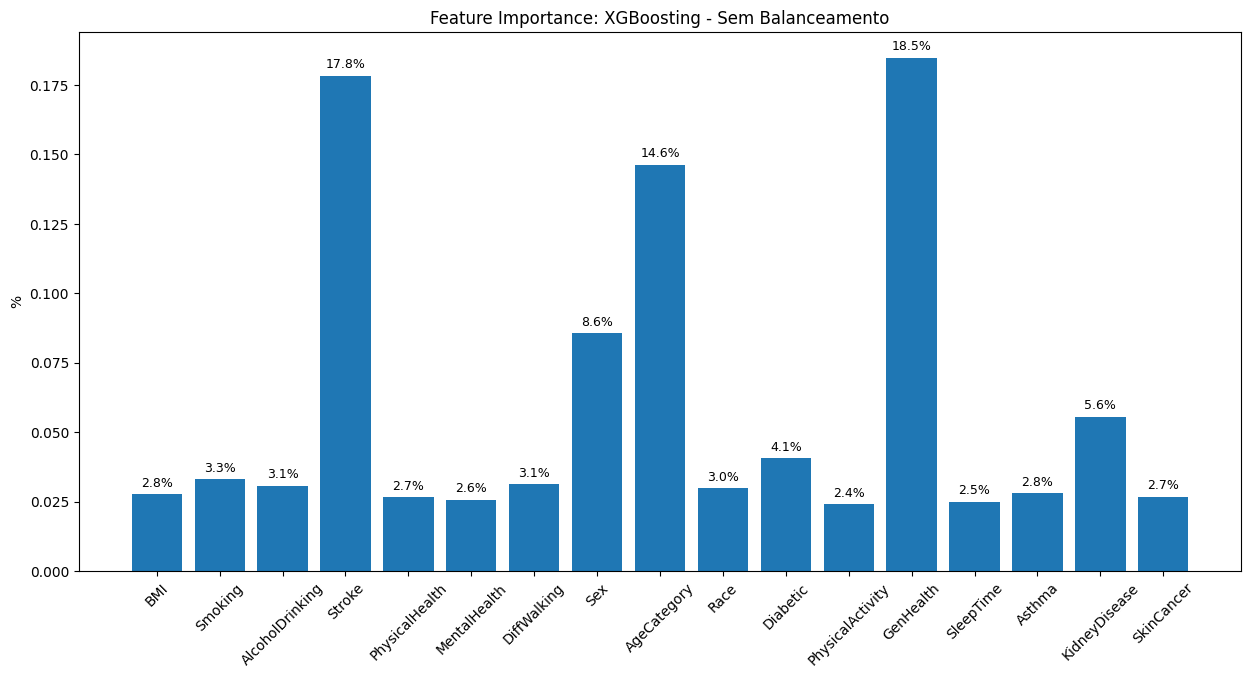

In [27]:
feature_importances = classificador_XGB_SemBal.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,7))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: XGBoosting - Sem Balanceamento')
plt.ylabel('%')
plt.show()

### SMOTEENN

In [14]:
validacao_cruzada(classificador_XGB_SMOTEENN, X_treino, y_treino, 'SMOTEENN')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 0: 0.8320538036926591
Precisão do split 0: 0.2676154923005133
F1 do split 0: 0.36619043818341446
Recall do split 0: 0.5797321202931514



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 1: 0.8316731171879956
Precisão do split 1: 0.269011296145336
F1 do split 1: 0.36727879799666113
Recall do split 1: 0.5786573146292585



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 2: 0.8268299388786667
Precisão do split 2: 0.26470258765542737
F1 do split 2: 0.36595942388105934
Recall do split 2: 0.5926761976423376



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 3: 0.8303195651714147
Precisão do split 3: 0.26859071337134877
F1 do split 3: 0.36521876730754016
Recall do split 3: 0.5704399406821552



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 4: 0.8298331324154559
Precisão do split 4: 0.2664221024876763
F1 do split 4: 0.36615723964077523
Recall do split 4: 0.5852430118358096

Média acurácia: 0.8301419114692384
Média precisão: 0.2672684383920604
Média F1: 0.3661609334018901
Média Recall: 0.5813497170165425


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [15]:
smoteenn = SMOTEENN(random_state=42, sampling_strategy=0.5, n_jobs=-1)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_treino, y_treino)

classificador_XGB_SMOTEENN.fit(X_smoteenn,y_smoteenn)

pred = classificador_XGB_SMOTEENN.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_XGB_SMOTEENN = []
list_results_XGB_SMOTEENN.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia de dados de teste: 0.8344288505951324
Precisão de dados de teste: 0.276376227828422
F1-score de dados de teste: 0.3747963584091998
Recall de dados de teste: 0.5820806667658878


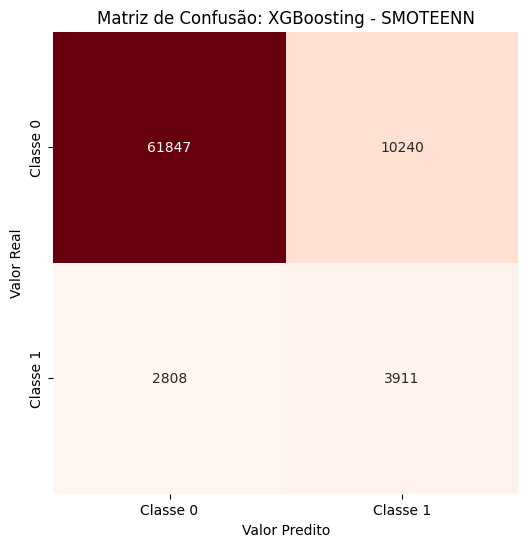

In [16]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: XGBoosting - SMOTEENN')
plt.show()

In [17]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.5820806667658878
Especificidade: 0.8579494222259214
Erro Tipo 1: 0.14205057777407853
Erro Tipo 2: 0.41791933323411223


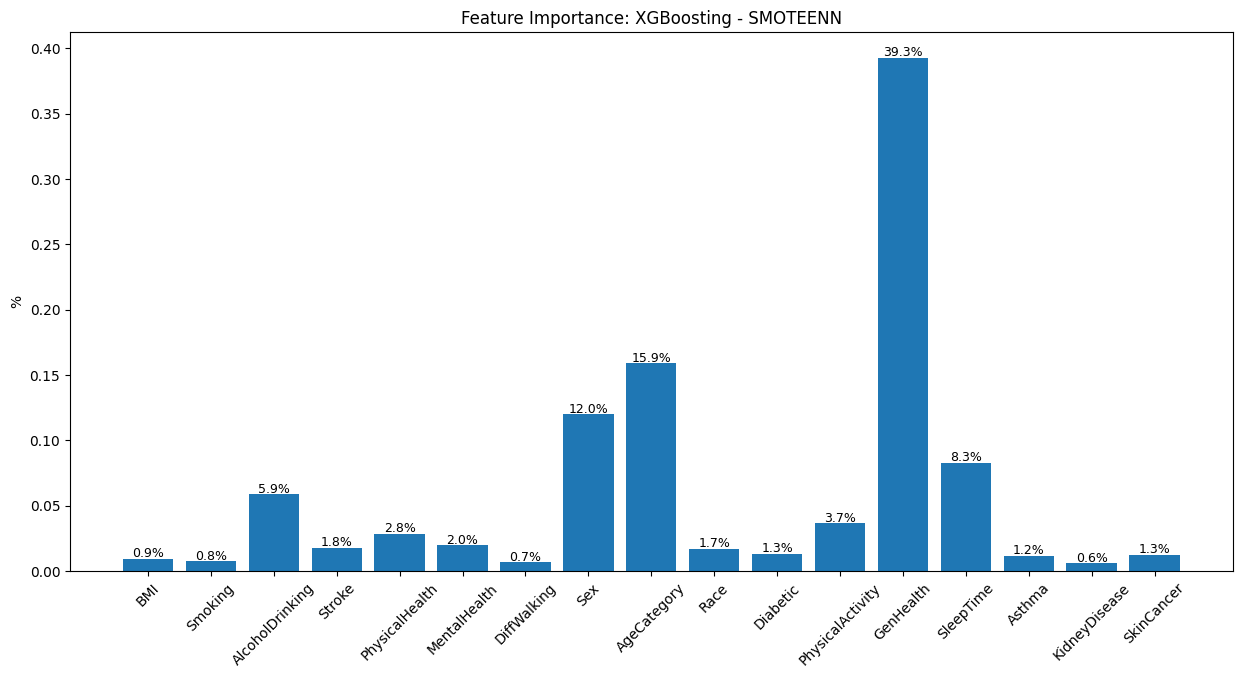

In [19]:
feature_importances = classificador_XGB_SMOTEENN.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,7))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: XGBoosting - SMOTEENN')
plt.ylabel('%')
plt.show()

### Avaliação Final XGBoosting

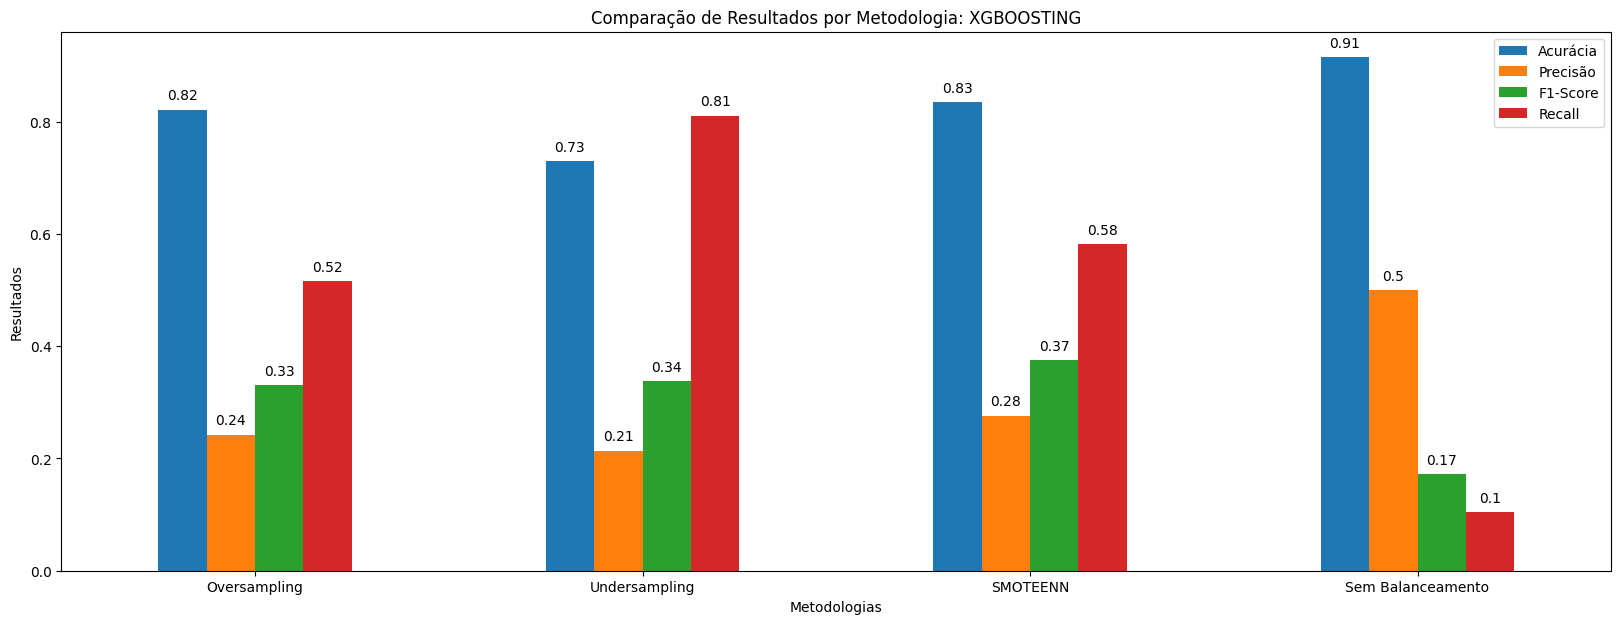

In [37]:
df_avaliacao_XGB = pd.DataFrame()
df_avaliacao_XGB['id'] = ['Acurácia', 'Precisão', 'F1-Score', 'Recall']
df_avaliacao_XGB['Oversampling'] = list_results_XGB_Oversampling
df_avaliacao_XGB['Undersampling'] = list_results_XGB_Undersampling
df_avaliacao_XGB['SMOTEENN'] = list_results_XGB_SMOTEENN
df_avaliacao_XGB['Sem Balanceamento'] = list_results_XGB_SemBal

df_avaliacao_XGB.set_index('id',inplace=True)

df_transpose = df_avaliacao_XGB.transpose()

ax = df_transpose.plot(kind='bar', figsize=(20, 7))
ax.legend(title='')
plt.title('Comparação de Resultados por Metodologia: XGBOOSTING')
plt.xlabel('Metodologias')
plt.ylabel('Resultados')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

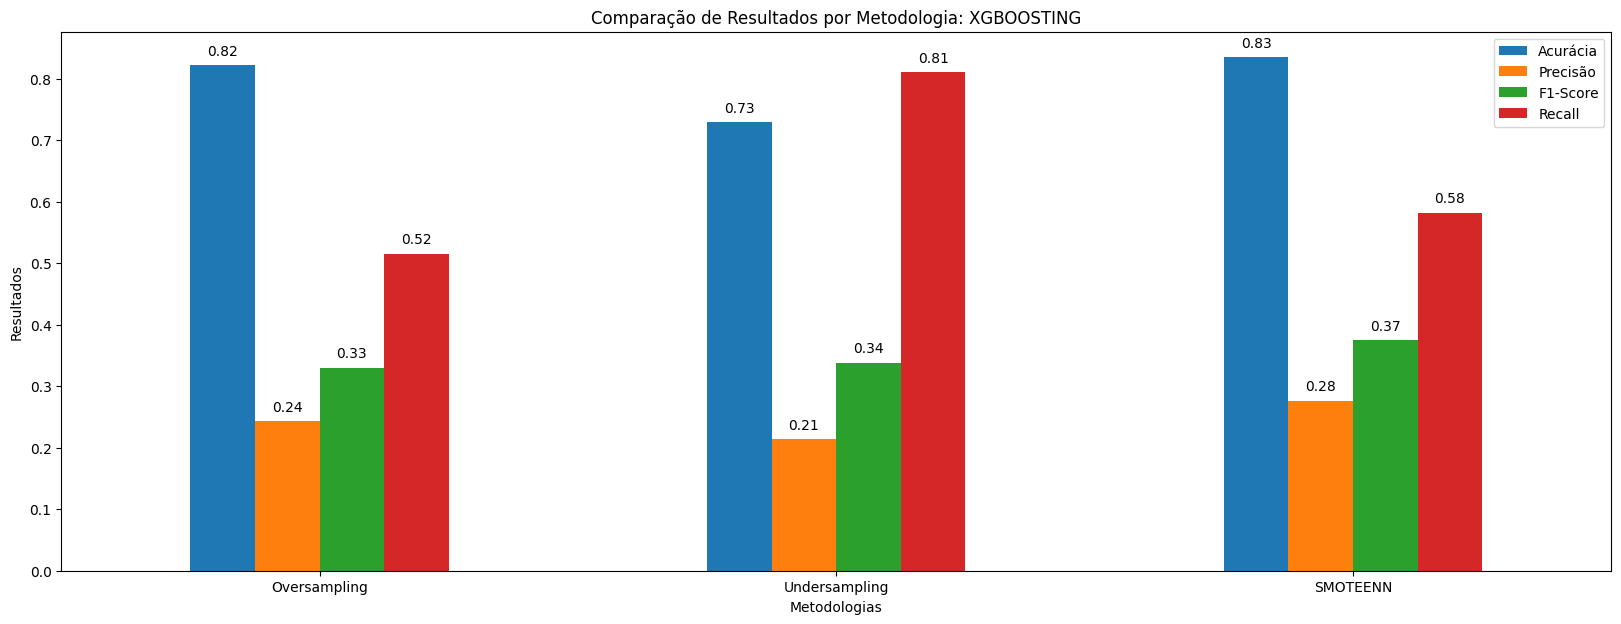

In [38]:
df_avaliacao_XGB = pd.DataFrame()
df_avaliacao_XGB['id'] = ['Acurácia', 'Precisão', 'F1-Score', 'Recall']
df_avaliacao_XGB['Oversampling'] = list_results_XGB_Oversampling
df_avaliacao_XGB['Undersampling'] = list_results_XGB_Undersampling
df_avaliacao_XGB['SMOTEENN'] = list_results_XGB_SMOTEENN
#df_avaliacao_XGB['Sem Balanceamento'] = list_results_XGB_SemBal

df_avaliacao_XGB.set_index('id',inplace=True)

df_transpose = df_avaliacao_XGB.transpose()

ax = df_transpose.plot(kind='bar', figsize=(20, 7))
ax.legend(title='')
plt.title('Comparação de Resultados por Metodologia: XGBOOSTING')
plt.xlabel('Metodologias')
plt.ylabel('Resultados')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

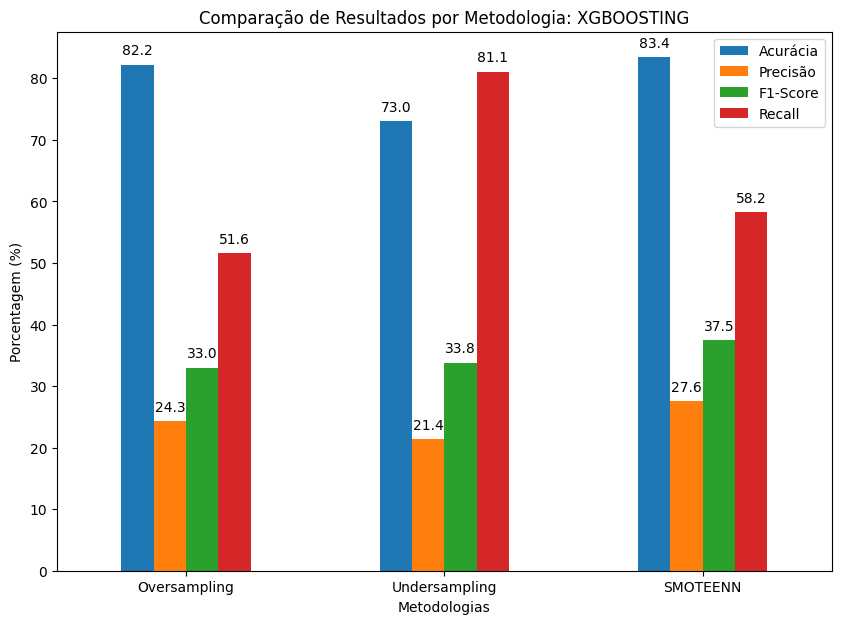

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df_avaliacao_XGB = pd.DataFrame()
df_avaliacao_XGB['id'] = ['Acurácia', 'Precisão', 'F1-Score', 'Recall']
df_avaliacao_XGB['Oversampling'] = [82.2, 24.3, 33, 51.6]
df_avaliacao_XGB['Undersampling'] = [73, 21.4, 33.8, 81.1]
df_avaliacao_XGB['SMOTEENN'] = [83.4, 27.6, 37.5, 58.2]

df_avaliacao_XGB.set_index('id',inplace=True)

df_transpose = df_avaliacao_XGB.transpose()

ax = df_transpose.plot(kind='bar', figsize=(10, 7))
ax.legend(title='')
plt.title('Comparação de Resultados por Metodologia: XGBOOSTING')
plt.xlabel('Metodologias')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()